In [116]:
from __future__ import division
import matplotlib.pyplot as plt
%matplotlib inline

# What are classes?

* A way of organising your code
* Data is inherently linked to the things you can do with it.
## Pros
* Can do everything you can do without classes, but idea is to make it *easier*
* Classes encourage code reuse through a concept called "inheritance" - we will discuss later.
## Cons
* Can make your code more complicated, and without careful thinking, harder to maintain.
* More work for the developer.

### Start by defining some terminology - Classes vs Objects vs Instances
* Often used interchangably but they are different concepts.
* A Class is like a template - you could consider the class "Car"
* An object is a particular occurence of a class - so, for example, you could have "Ford Mondeo", "Vauxhall Astra", "Lamborghini Gallardo" be **objects** of type "Car".
* An instance is a unique **single** object.


### Where are classes used in Python? Everywhere!

You've been using classes all of the time, without even knowing it. Everything in Python is an **object**. You have some **data** (number, text, etc.)with some **methods** (or functions) which are internal to the object, and which you can use on that data. Lets look at a few examples...

In [1]:
a = 10.1

In [2]:
type(a)

float

How can I see what methods an object of type float has?

In [3]:
print(dir(a)) # Show all of the methods of a

['__abs__', '__add__', '__class__', '__coerce__', '__delattr__', '__div__', '__divmod__', '__doc__', '__eq__', '__float__', '__floordiv__', '__format__', '__ge__', '__getattribute__', '__getformat__', '__getnewargs__', '__gt__', '__hash__', '__init__', '__int__', '__le__', '__long__', '__lt__', '__mod__', '__mul__', '__ne__', '__neg__', '__new__', '__nonzero__', '__pos__', '__pow__', '__radd__', '__rdiv__', '__rdivmod__', '__reduce__', '__reduce_ex__', '__repr__', '__rfloordiv__', '__rmod__', '__rmul__', '__rpow__', '__rsub__', '__rtruediv__', '__setattr__', '__setformat__', '__sizeof__', '__str__', '__sub__', '__subclasshook__', '__truediv__', '__trunc__', 'as_integer_ratio', 'conjugate', 'fromhex', 'hex', 'imag', 'is_integer', 'real']


In [4]:
a.is_integer()

False

### Aside - What do all those underscores mean?
 
They're *hidden* methods - we'll talk more about these later.

## Creating a class

Define some key things:
* self - 'self' is a special type of variable which can be used inside the class to refer to itself.
* Methods - a function which is part of a class, and which have access to data held by a class.
* A constructor - a special method which is called when you create an instance of a class. In Python this function must be called "\_\_init\_\_"
* A destructor - a special method which is called when you destroy an instance of a class.

Aside: If you're a C++/Java programmer, 'self' is exactly equivalent to 'this', but functions *must* have self as an argument, as it is passed in implicitly as the first argument of any method call in Python.

In [72]:
# Create a class by using class keyword followed by name.
class MyClass:
    # The 'self' variable ALWAYS needs to be the first variable given to any class method.
    def __init__(self, message):
        # Here we create a new variable inside "self" called "mess" and save the argument "message"
        #  passed from the constructor to it.
        self.mess = message
    
    def say(self):
        print(self.mess)
    
        
    # Don't normally need to write a destructor - one is created by Python automatically. However we do it here
    # just to show you that it can be done:
    def __del__(self):
        print("Deleting object of type MyClass")

##  Using the class
Use the same syntax as we use to call a function, *BUT* the arguments get passed in to the "\_\_init\_\_" function. Note that you *ignore* the self object, as Python sorts this out.

In [73]:
a = MyClass("Hello")
print(a.mess)

Hello


How do I access data stored in the class? with the ".", followed by the name.

In [74]:
# But, we also defined a method called "say" which does the same thing:
a.say()

Hello


What happens though if we reuse the variable name 'a'?

Aside:
* Your computer has Random Access Memory (RAM) which is used to store information.
* Whenever, in a programming language, you tell the language to store something, you effectively create a 'box' of memory to put those values in.
* The location of the specific 'box' is known as a 'memory address'
* You can see the memory address of a Python object quite easily:

In [75]:
print(a)


<__main__.MyClass instance at 0x1031033f8>


So, what happens if we either choose to store something else under the name 'a', or tell Python to delte it?

In [76]:
del a
a = MyClass('Hello')
a = 2

Deleting object of type MyClass
Deleting object of type MyClass


### Why bother? This can be achieved without classes very easily:

In [ ]:
mess = "Hello"

def say(mess):
    print(mess)
    
say(mess)

## Need a better example!

How about a Simulation class?
* Write once, but can take different parameters.
* Can include data analysis methods as well


# Consider a 1-D box of some length:
What information does it need to know about itself?
* How big is the box?

In [ ]:
class Box:
    def __init__(self, length):
        self.length = length

What we're going to try and do is add particles to the box, which have some properties:
* An initial position.
* An initial velocity

    $r(t + \delta t) \approx r(t) + v(t)\delta t$

In [78]:
class Particle:
    def __init__(self, r0, v0):
        """
        r0 = initial position
        v0 = initial speed
        """
        self.r = r0
        self.v = v0
    
    def step(self, dt, L):
        """
        Move the particle
        dt = timestep
        L = length of the containing box
        """
        self.r = self.r + self.v * dt
        
        if self.r >= L:
            self.r -= L
        elif self.r < 0:
            self.r += L
    

Lets just check this, if a Particle is in a box of length 10, has r0 = 0, v0=5, then after 1 step of length 3, the position should be at position 5:

In [82]:
p = Particle(0, 5)
p.step(3, 10)
print(p.r)

5


Lets add a place to store the particles to the box class, and add a method to add particles to the box:

In [83]:
class Box:
    def __init__(self, length):
        self.length = length
        self.particles = []
    
    def add_particle(particle):
        self.particles.append(particle)

## Now lets get you to do something...

Tasks (30-40 minutes):

1) Add a method that calculates the average position of Particles in the box (Hint: you might have to think about what to do when there are no particles!)

2) Add a method that makes all of the particles step forwards, and keep track of how much time has passed in the box class.

3) Add a method which plots the current position of the particles in the box.

4) Write a method that writes the current positions and velocities to a file.

5) Write a method that can load a CSV file of positions and velocities, create particles with these and then add them to the Box list of particles. (Hint: Look up the documentation for the module 'csv')

In [155]:
class Box:
    def __init__(self, length):
        self.length = length
        self.particles = []
        self.t = 0
        
    def add_particle(self, particle):
        self.particles.append(particle)
    
    def step(self, dt):
        for particle in self.particles:
            particle.step(dt, self.length)
            
    def write(self, filename):
        f = open(filename, 'w')
        for particle in self.particles:
            f.write('{},{}\n'.format(particle.r, particle.v))
        f.close()
        
    def plot(self):
        for particle in self.particles:
            plt.scatter(particle.r, 0)
            
    def load(self, filename):
        f = open(filename, 'r')
        csvfile = csv.reader(f)
        for position, velocity in csvfile:
            p = Particle(position, velocity)
            self.add_particle(p)
        

In [138]:
b = Box(10)


for i in range(10):
    p = Particle(i/2, i/3)
    b.add_particle(p)
    
b.write('test.csv')

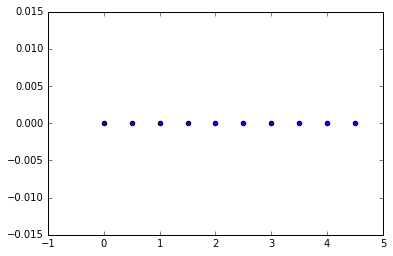

In [118]:
b.plot()

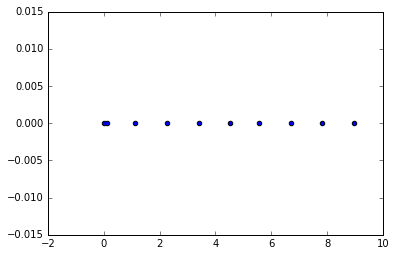

In [134]:
b.step(1)
b.plot()

In [108]:
b.write('test.csv')

In [109]:
!cat test.csv

0.0,0.0
0.5,0.333333333333
1.0,0.666666666667
1.5,1.0
2.0,1.33333333333
2.5,1.66666666667
3.0,2.0
3.5,2.33333333333
4.0,2.66666666667
4.5,3.0


## Class Properties

* Properties can be used to do interesting things
* Lets adjust the class Particle we used:


In [160]:
class Particle:
    def __init__(self, r0, v0):
        """
        r0 = initial position
        v0 = initial speed
        """
        self._r = r0
        self._v = v0
    
    def step(self, dt, L):
        """
        Move the particle
        dt = timestep
        L = length of the containing box
        """
        self._r = self._r + self._v * dt
        
        if self._r >= L:
            self._r -= L
        elif self._r < 0:
            self._r += L
    
    @property
    def r(self):
        return self._r
    
    @r.setter
    def r_setter(self, value):
        self._r = value
        
    @property
    def v(self):
        return self._v
    
    @r.setter
    def r_setter(self, value):
        self._v = value

## Why bother? It looks the same!

* Well known in programming - 'an interface is a contract'
* You might want to at some point rewrite a large portion of the underlying data - how it is stored for example.
* If you do this without using properties to access the data, you then need to go through all code that uses this class and change it to use the new variable names.

# Inheritance

* Last part of the course on Classes, but also the main reason for using classes!
* Inheritance allows you to reuse parts of the code, but change some of the methods. Lets see how it might be useful...



In [178]:
class SlowParticle(Particle):
    def __init__(self, r0, v0, slowing_factor):
        Particle.__init__(self, r0, v0)
        self.factor = slowing_factor
    
    def step(self, dt, L):
        """
        Move the particle, but change so that if the particle bounces off of a wall,
        it slows down by 50%
        dt = timestep
        L = length of the containing box
        """
        self._r = self._r + self._v * dt
        
        if self._r >= L:
            self._r -= L
            self._v /= factor
        elif self._r < 0:
            self._r += L
            self._v /= factor

* Here we have **inherited** most of the class Particle, and just changed the method 'step' to do something differently. Because we kept the properties the same, we can use this class everywhere that we could use Particle - our Box class can take a mixture of Particles and SlowParticles